In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings

In [3]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore') # Ignore notifications
np.set_printoptions(suppress=True) # Removing the scientific record in numpy
pd.set_option('display.float_format', '{:.10g}'.format) # Removing the scientific record in pandas


In [4]:
df = pd.read_csv("C:/Users/premt/OneDrive/Desktop/Data Analytics course/Python Projects/Milatary Expenditure/military expenditure.csv")

In [5]:
df

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2939585.501,NaN,1.629606099,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3341271.551,NaN,1.868910256,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3581366.351,NaN,1.610824742,South Asia,Low income
...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,358065000,7.363047502,1.742493552,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,340522000,5.519889771,1.544948051,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,420364000,5.607096172,1.222794967,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,546939000,2.099815718,0.698600973,Sub-Saharan Africa (excluding high income),Lower middle income


In [6]:
df.describe()

,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP)
count,13566,8769,5282,8777
mean,1995,3.676065125e+10,7.658513985,2.722603135
std,14.72014399,1.422586715e+11,6.04893812,2.921869003
min,1970,0,0,0
25%,1982,120000000,3.665614404,1.32720743
50%,1995,1148445710,6.033675205,2.013004573
75%,2008,8533090258,9.996249454,3.218260665
max,2020,1.92885e+12,57.47809762,117.3498232


In [7]:
print(f'Dataset size: {df.shape}')

Dataset size: (13566, 9)


In [8]:
print(f'Columns:\n {list(df.columns)}')

Columns:
 ['country', 'iso3c', 'iso2c', 'year', 'Military expenditure (current USD)', 'Military expenditure (% of general government expenditure)', 'Military expenditure (% of GDP)', 'adminregion', 'incomeLevel']


In [9]:
print(f'Data types: {df.dtypes}')

Data types: country                                                        object
iso3c                                                          object
iso2c                                                          object
year                                                            int64
Military expenditure (current USD)                            float64
Military expenditure (% of general government expenditure)    float64
Military expenditure (% of GDP)                               float64
adminregion                                                    object
incomeLevel                                                    object
dtype: object


In [10]:
print(f'Number of missing values:\n{df.isna().sum()}')

Number of missing values:
country                                                          0
iso3c                                                          102
iso2c                                                          153
year                                                             0
Military expenditure (current USD)                            4797
Military expenditure (% of general government expenditure)    8284
Military expenditure (% of GDP)                               4789
adminregion                                                   6579
incomeLevel                                                    102
dtype: int64


In [11]:
countries = df.country.unique().tolist()
print(f'All countries:\n{countries}')

All countries:
['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (I

In [12]:
# We will remove the excess for convenienc of analysis
rf = df.loc[df['incomeLevel'] != 'Aggregates', :]

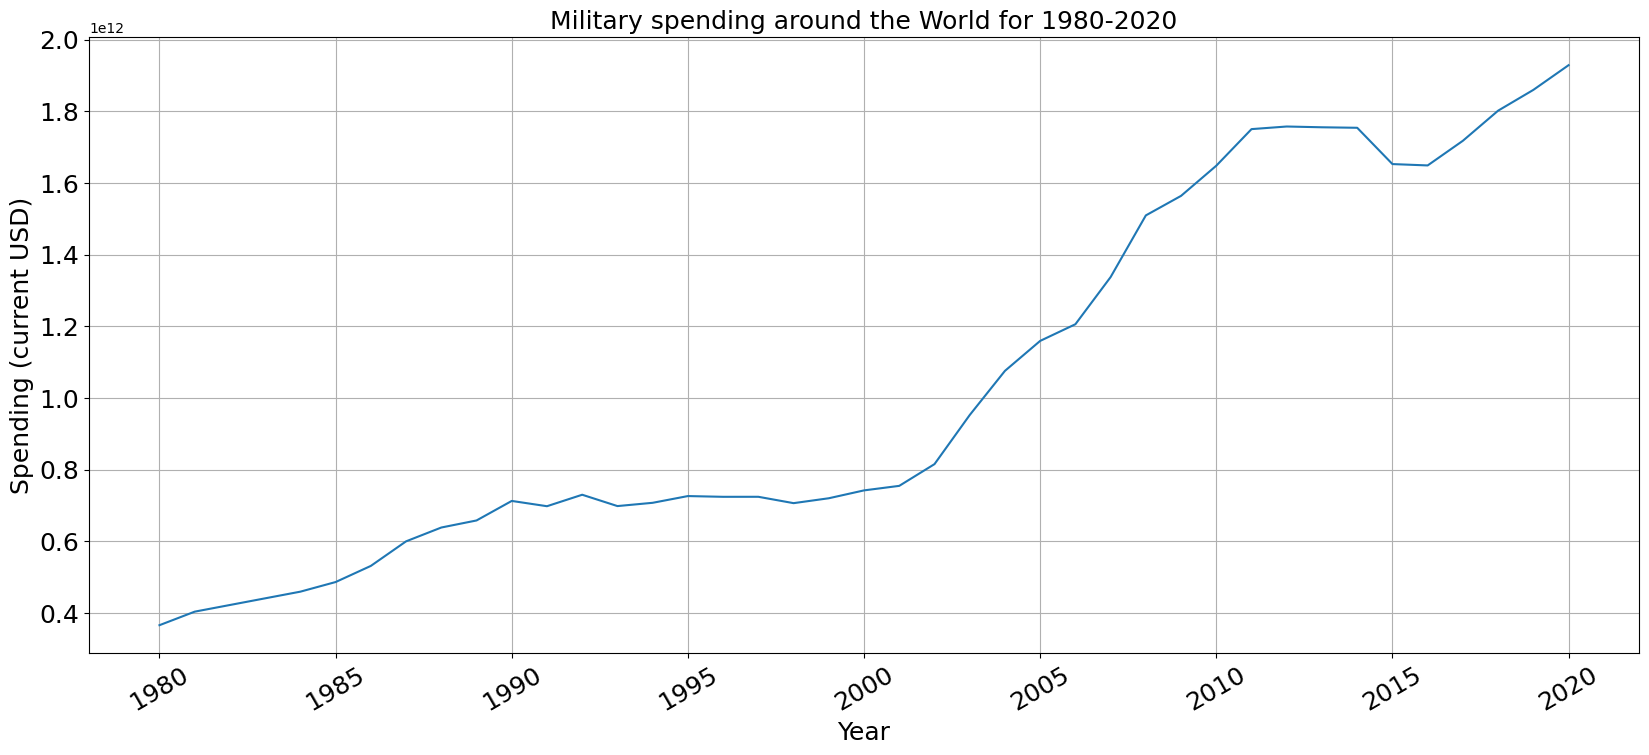

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined and contains the relevant data
# Example of loading data into df:
# df = pd.read_csv('your_data_file.csv')

plt.figure(figsize=(20,8))
years = [i for i in range(df['year'].min(), df['year'].max() + 1)]
plt.grid()

# Extracting world military expenditure data
world_military_expenditure = df[df['country'] == 'World']['Military expenditure (current USD)']

sns.lineplot(x=years, y=world_military_expenditure)
plt.title('Military spending around the World for 1980-2020', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Spending (current USD)', fontsize=18)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [16]:
# Assuming rf is already defined and contains the relevant data


# Calculate the difference between the maximum and minimum military expenditure for each country
max_min = rf.groupby('country')['Military expenditure (current USD)'].max() - \
          rf.groupby('country')['Military expenditure (current USD)'].min()

# Get the top 10 countries with the largest difference
top_10 = max_min.nlargest(10)

print(top_10)


country
United States               6.999940201e+11
China                       2.425016246e+11
Saudi Arabia                8.671431111e+10
Russian Federation          8.188386125e+10
Latin America & Caribbean   7.563615959e+10
India                       7.105447994e+10
United Kingdom              6.665593309e+10
Japan                       5.918686662e+10
France                      5.150039608e+10
Germany                     4.695950713e+10
Name: Military expenditure (current USD), dtype: float64


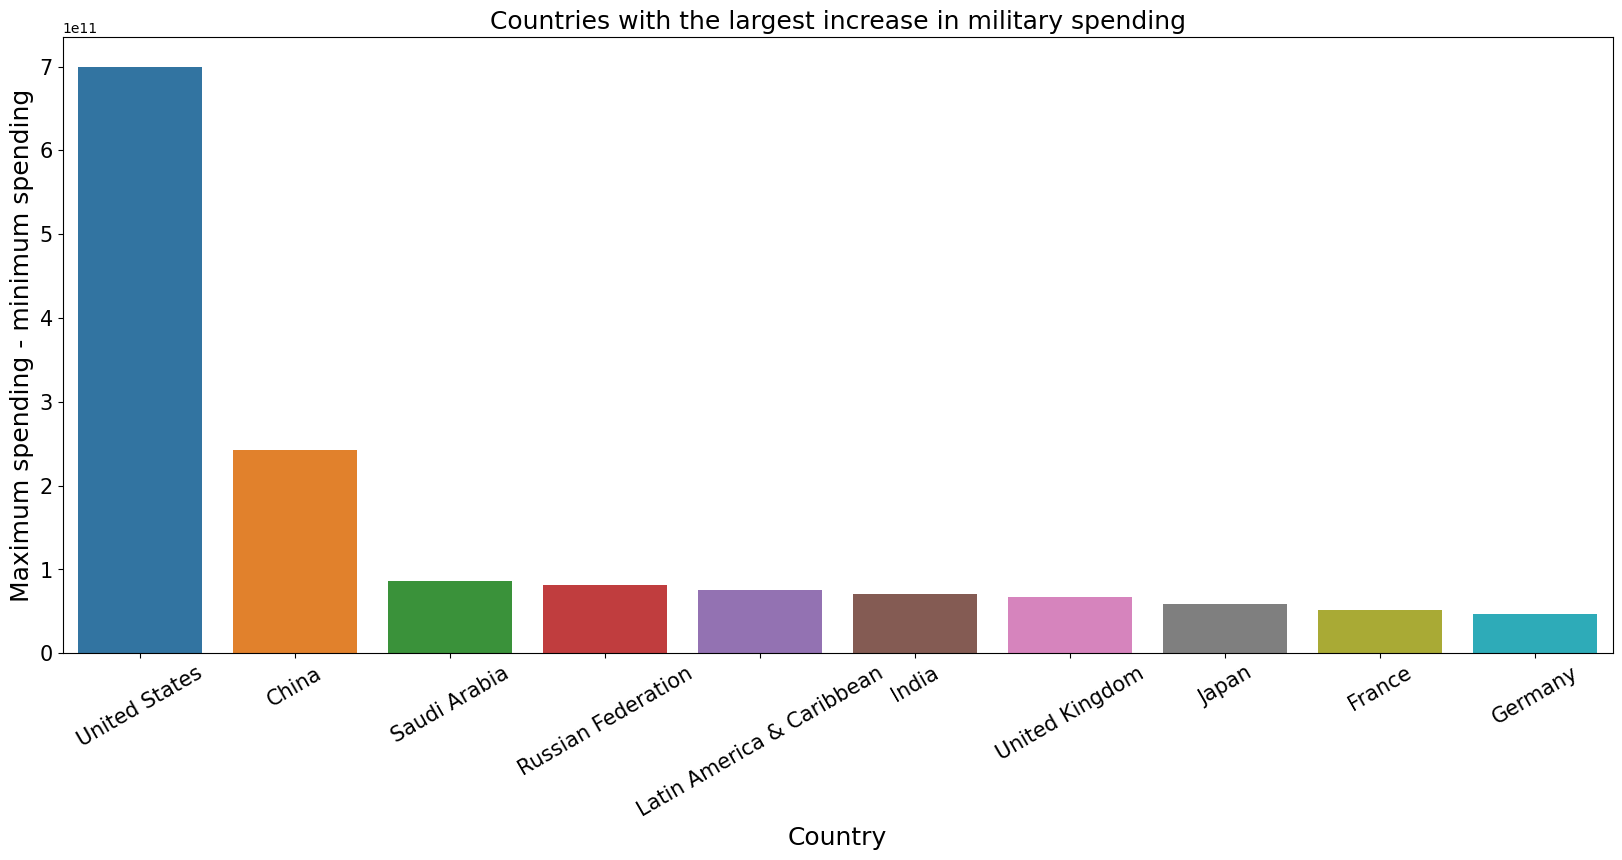

In [18]:


plt.figure(figsize=(20, 8))
plt.title('Countries with the largest increase in military spending', fontsize=18)
plt.ylabel('Maximum spending - minimum spending', fontsize=18)

# Creating the bar plot
sns.barplot(x=top_10.index, y=top_10.values)

# Customizing the x and y ticks
plt.xticks(rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Country', fontsize=18)

# Displaying the plot
plt.show()


In [20]:
# Calculate the total military expenditure for each country
total_expenditure = rf.groupby('country')['Military expenditure (current USD)'].sum()

# Get the top 5 countries with the highest total military expenditure
top_5 = total_expenditure.nlargest(5)

# Convert the index of the top 5 to a list
top_5_countries = list(top_5.index)

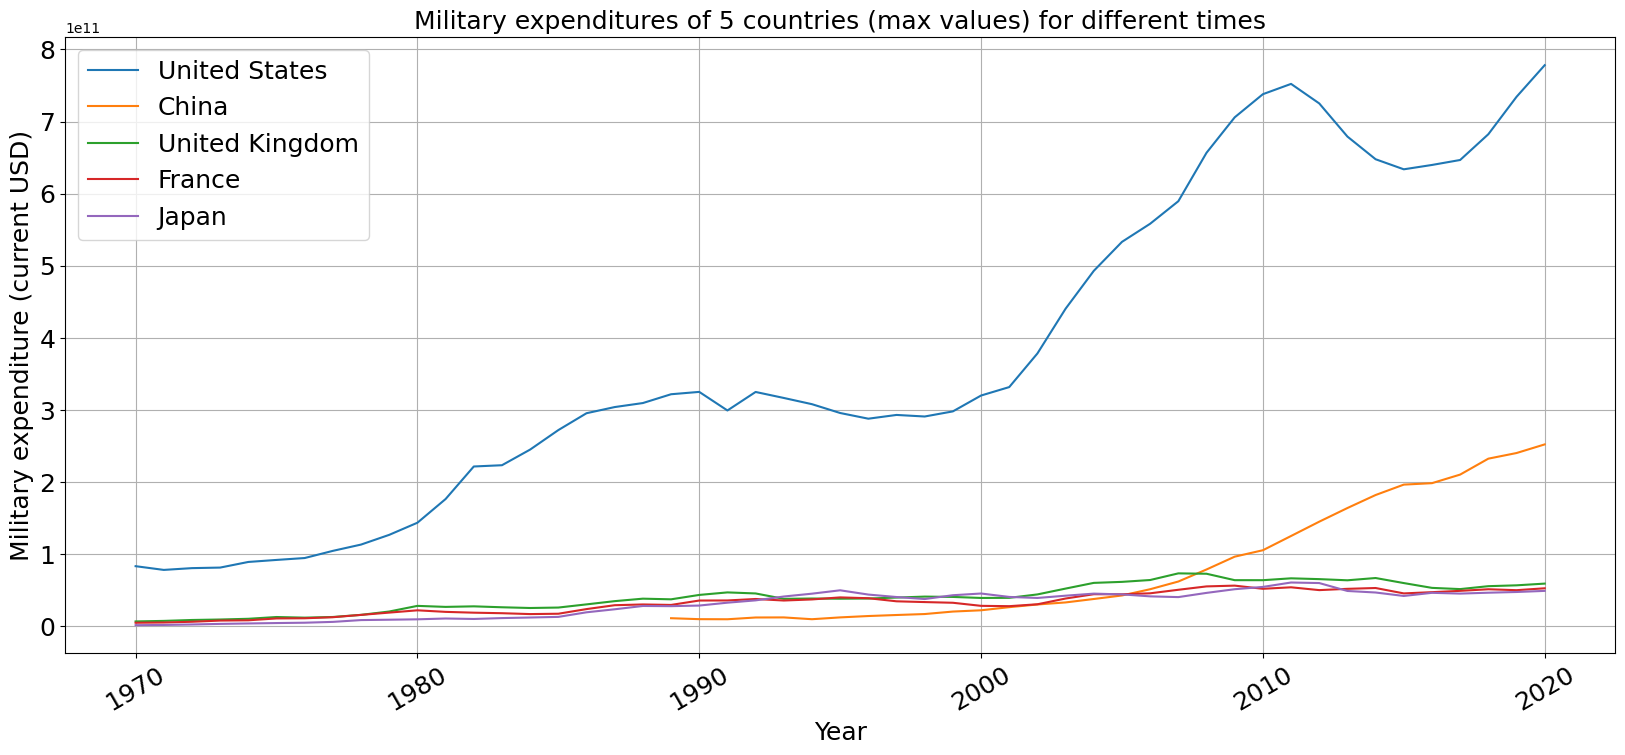

In [29]:


def plotter_1(top_5):
    plt.figure(figsize=(20, 8))
    plt.title('Military expenditures of 5 countries (max values) for different times', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    
    for top_country in top_5:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        sns.lineplot(x=YEARS, y=EXPENDITURE, label=top_country)
    
    plt.legend(fontsize=18)
    plt.xticks(rotation=30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)
    plt.grid()
    plt.show()


plotter_1(top_5_countries)




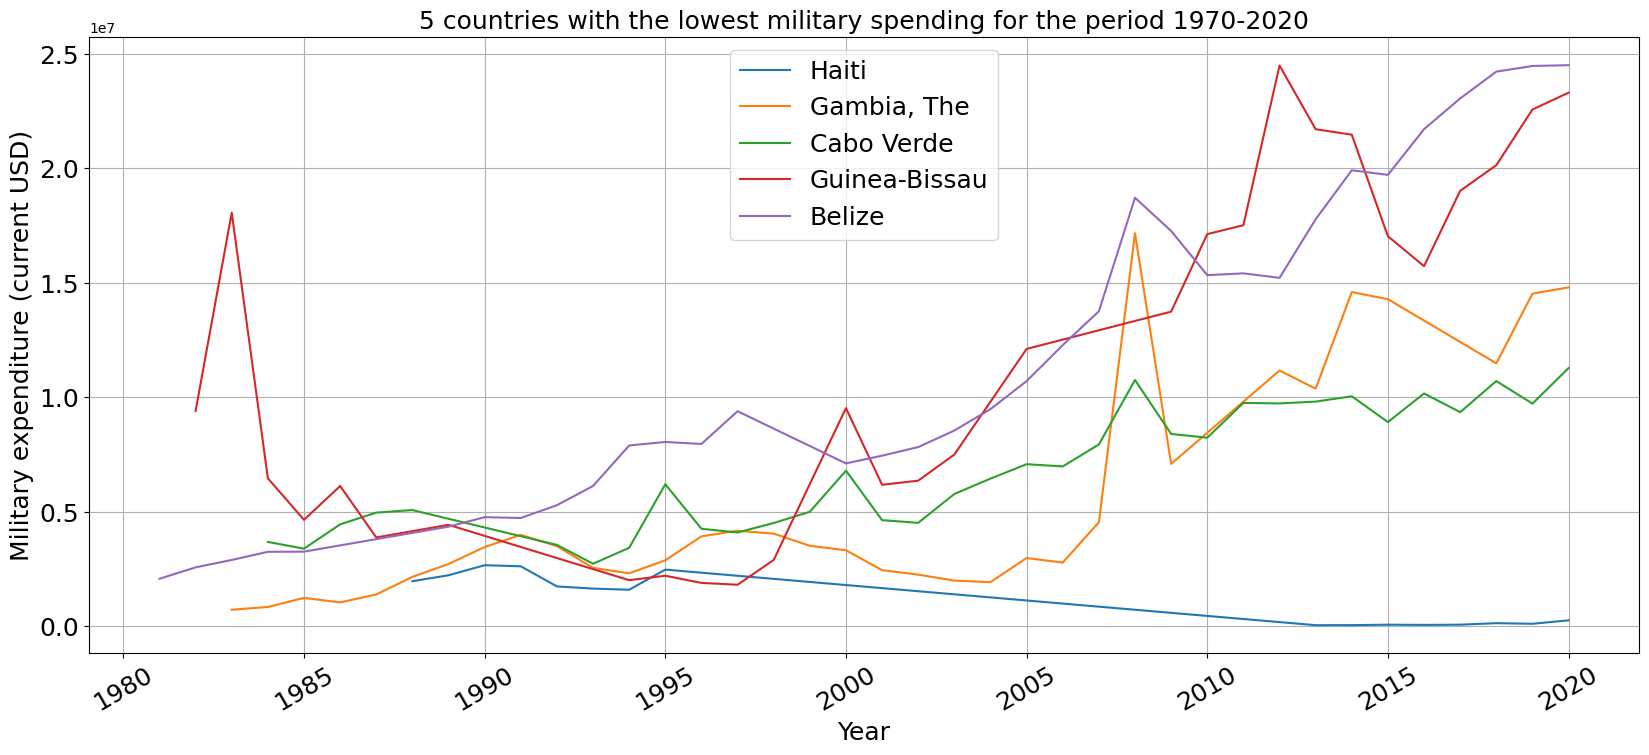

In [32]:


# Filter the DataFrame to include only positive military expenditures
tf = df.loc[df['Military expenditure (current USD)'] > 0, :]

# Calculate the total military expenditure for each country and find the 5 smallest
smallest_5 = tf.groupby('country')['Military expenditure (current USD)'].sum().nsmallest(5)
smallest_5 = list(smallest_5.index)

def plotter_10(smallest_5):
    plt.figure(figsize=(20, 8))
    plt.title('5 countries with the lowest military spending for the period 1970-2020', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    
    for country in smallest_5:
        EXPENDITURE = df.loc[df['country'] == country, 'Military expenditure (current USD)']
        sns.lineplot(x=YEARS, y=EXPENDITURE, label=country)
    
    plt.legend(fontsize=18)
    plt.xticks(rotation=30, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)
    plt.grid()
    plt.show()

# Example usage:
plotter_10(smallest_5)


In [34]:


def plotter_2(Income, n):
    fig, ax = plt.subplots(figsize=(20, 8))
    
    # Filter the DataFrame for the given income level
    hf = df.loc[df['incomeLevel'] == Income, ['country', 'Military expenditure (% of GDP)']]
    
    # Randomly select n countries from the filtered DataFrame
    selected_countries = random.choices(hf['country'].tolist(), k=n)
    hf = hf.loc[hf['country'].isin(selected_countries), :]
    
    # Group by country and calculate the max and min military expenditure as % of GDP
    group = hf.groupby('country')
    max_Military_expenditure = group['Military expenditure (% of GDP)'].max()
    min_Military_expenditure = group['Military expenditure (% of GDP)'].min()
    
    # Plot the data
    ax.set_title(f'Analysis of {Income} countries', fontsize=17)
    width = 0.3
    x = np.arange(len(max_Military_expenditure.index.tolist()))
    
    ax.bar(x - width/2, max_Military_expenditure.values, width=0.3, label='Maximum % of GDP')
    ax.bar(x + width/2, min_Military_expenditure.values, width=0.3, label='Minimum % of GDP')
    
    ax.set_xticks(x)
    ax.set_xticklabels(max_Military_expenditure.index.tolist(), rotation=90, fontsize=13)
    plt.grid()
    ax.legend(fontsize=15, loc='best')
    ax.set_xlabel('Country', fontsize=16)
    ax.set_ylabel('Military expenditure (% of GDP)', fontsize=16)
    plt.yticks(fontsize=15)
    plt.show()

# Example usage:
# plotter_2('High income', 10)


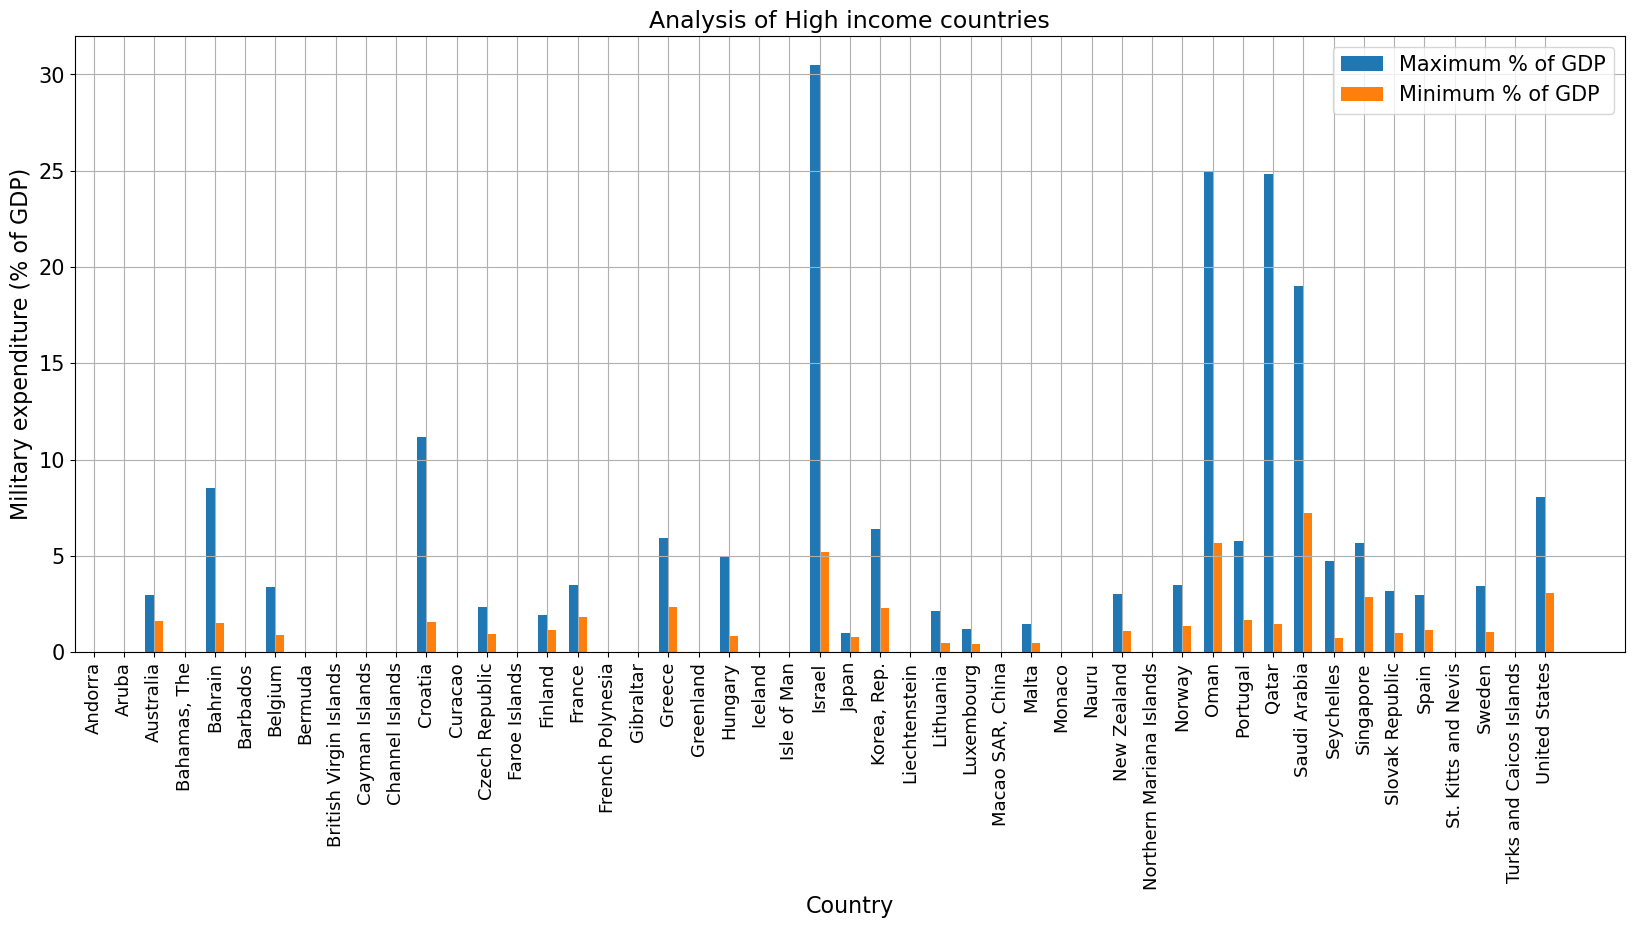

In [35]:
plotter_2('High income', 70)

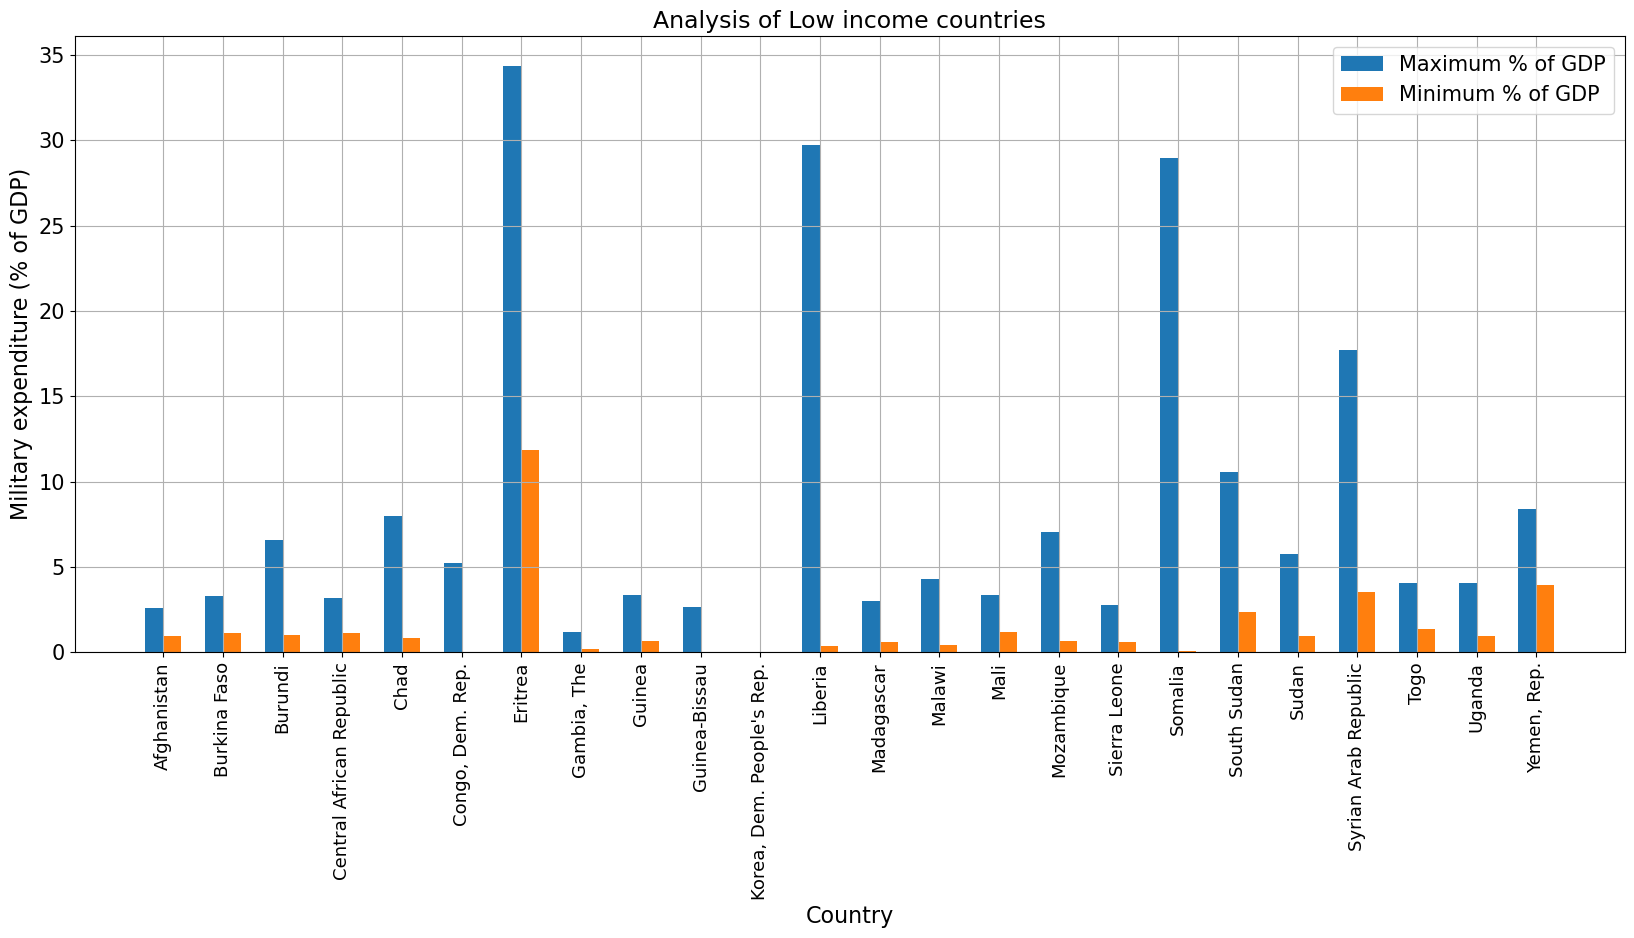

In [36]:
plotter_2('Low income', 70)

In [37]:
income_level_list = df['incomeLevel'].dropna().unique().tolist()
income_level_list.remove('Not classified')
income_level_list.remove('Aggregates')
income_level_list

['Low income', 'Upper middle income', 'Lower middle income', 'High income']

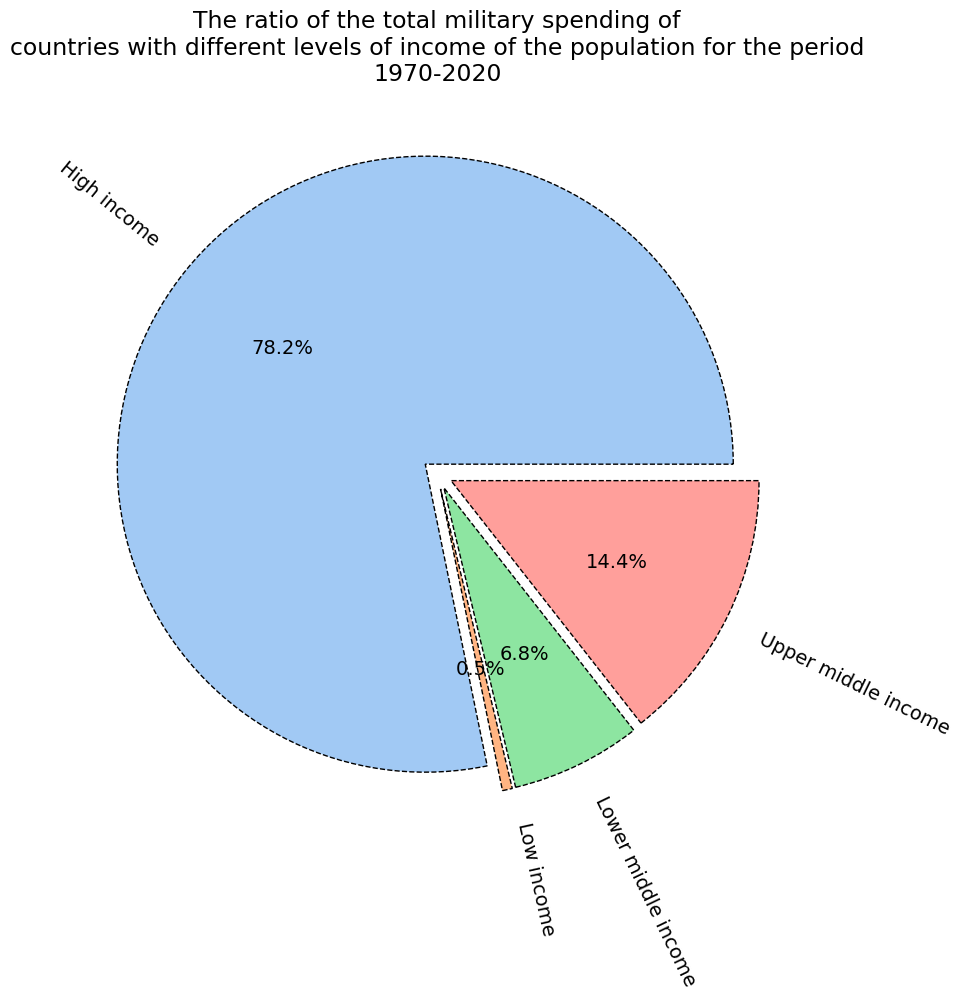

In [39]:


# Calculate the total military expenditure for each income level
ef = pd.DataFrame(df.groupby('incomeLevel').sum()['Military expenditure (current USD)'])

# Drop the unwanted categories
ef.drop(index=['Aggregates', 'Not classified'], inplace=True)

# Define the explode parameter for the pie chart
explode = (0.05, 0.05, 0.05, 0.05)

# Define the list of income levels
income_level_list = ef.index.tolist()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.title('''The ratio of the total military spending of
countries with different levels of income of the population for the period
1970-2020''', fontsize=17)
plt.pie(
    ef['Military expenditure (current USD)'],
    labels=income_level_list,
    autopct='%1.1f%%',
    shadow=False,
    wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': 'k'},
    rotatelabels=True,
    explode=explode,
    colors=sns.color_palette('pastel')[0:4],
    textprops={'fontsize': 14}
)
plt.show()


In [41]:


# Filter the DataFrame to include only specified income levels
df_update = df[df['country'].isin(['Low income', 'Lower middle income', 'Upper middle income', 'High income'])]

# Select the desired columns
df_update = df_update.loc[:, ['country', 'year', 'Military expenditure (% of general government expenditure)']]


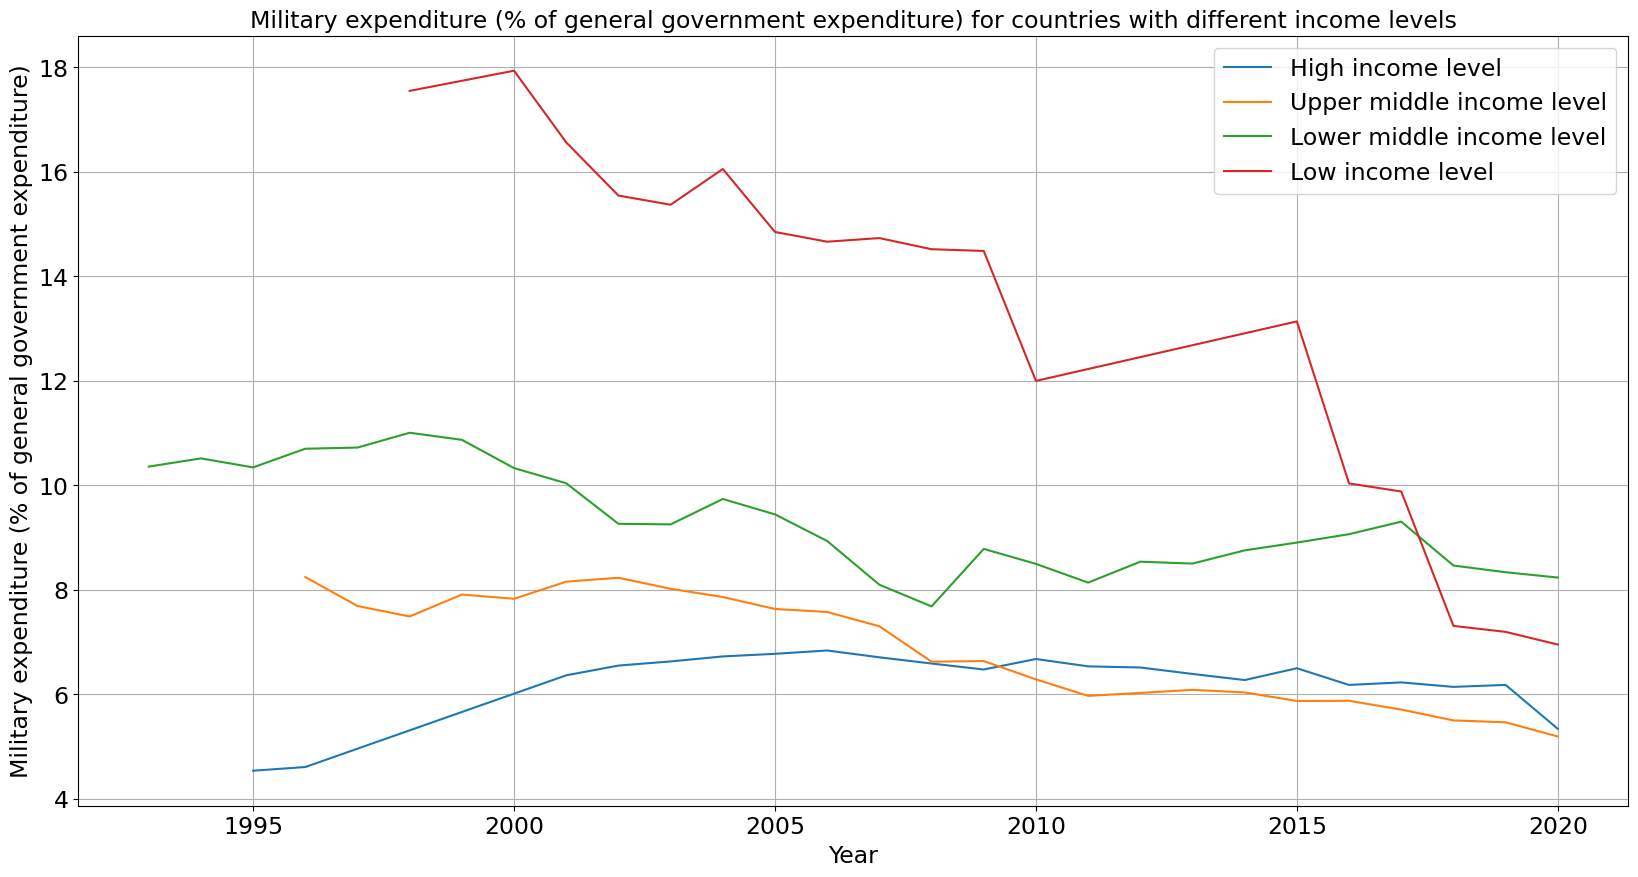

In [43]:

def plotter_3(income_level):
    sns.lineplot(
        x='year', 
        y='Military expenditure (% of general government expenditure)', 
        data=df_update[df_update['country'] == income_level],
        label=f'{income_level} level'
    )

plt.figure(figsize=(20, 10))
plt.title('Military expenditure (% of general government expenditure) for countries with different income levels', fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Military expenditure (% of general government expenditure)', fontsize=17)
plt.grid()

plotter_3('High income')
plotter_3('Upper middle income')
plotter_3('Lower middle income')
plotter_3('Low income')

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=17)
plt.show()
